In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Credit Approvals Data Set 

__Source:__ [https://archive.ics.uci.edu/ml/datasets/Credit+Approval]

All attribute names and values have been changed to meaningless symbols to protect the confidentiality of the data

In [2]:
#importing data
credit_raw = pd.read_csv('credit_approvals.csv', header=None)
credit_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## Cleaning Data

In [3]:
#turning 1 into int and removing ?
credit_raw[1] = credit_raw[1].map(lambda x: None if x is '?' else float(x))

In [4]:
#turning + into 1 and - into 0
credit_raw[15] = credit_raw[15].map(lambda x: 1 if x is '+' else 0)

In [5]:
#removing ? from data 
for col in credit_raw:
    credit_raw[col] = credit_raw[col].map(lambda x: None if x is '?' else x)
credit_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


## Exploring Data

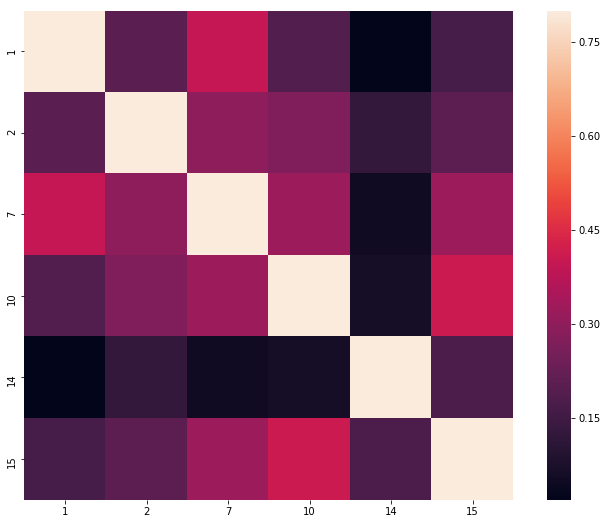

In [6]:
#identifying correlated variables through heatmap
corrmat = credit_raw.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

Variable 15 is our accept or reject indicator, so 7 and 10 are highly correlated to acceptance and rejection.  

In [7]:
#creating subset of data with continuous data
credit_cont = credit_raw.loc[:, [1, 2, 7, 10, 14, 15]]
credit_cont.head()

,1,2,7,10,14,15
0,30.83,0.000,1.25,1,0,1
1,58.67,4.460,3.04,6,560,1
2,24.50,0.500,1.50,0,824,1
3,27.83,1.540,3.75,5,3,1
4,20.17,5.625,1.71,0,0,1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


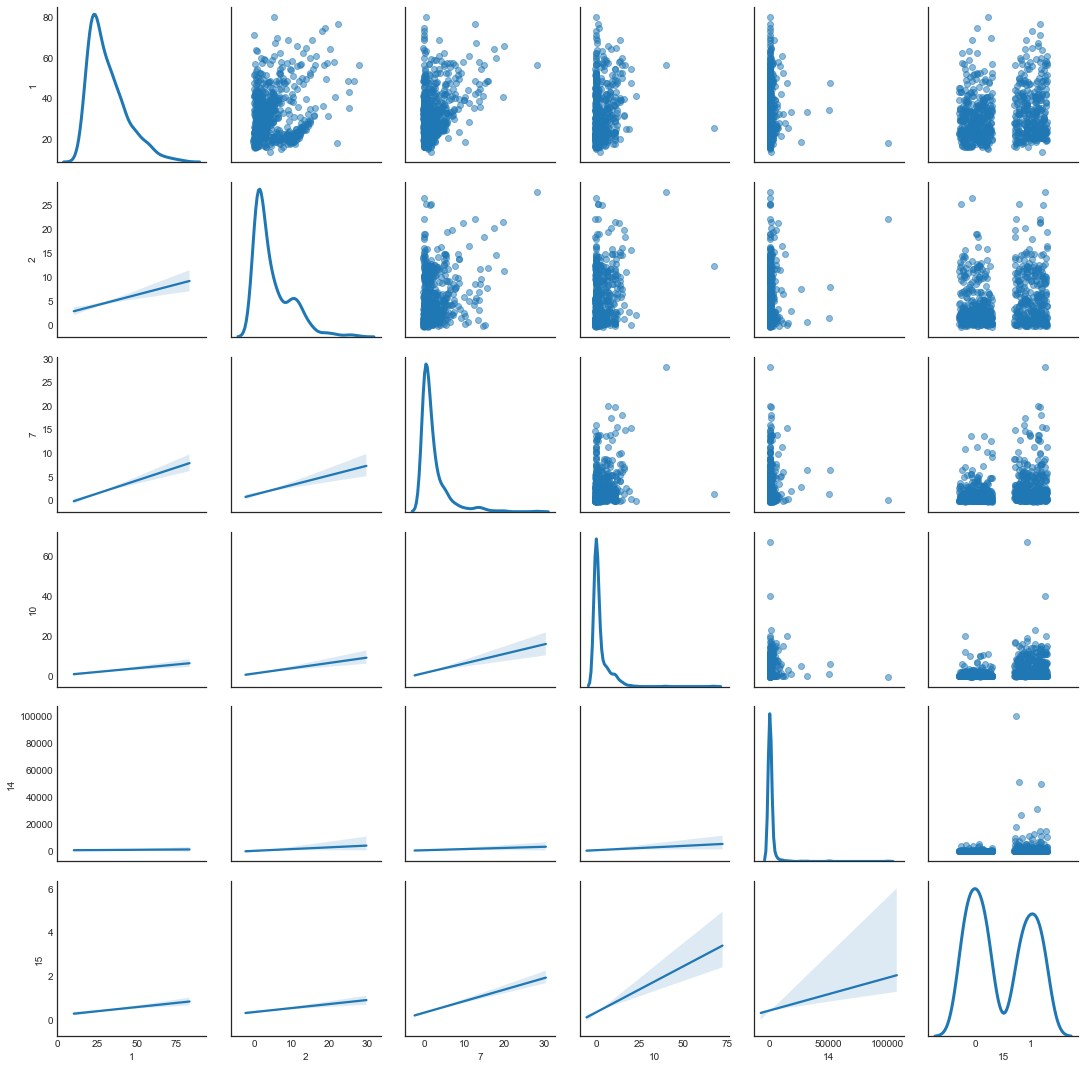

In [8]:
#scatterplot matrix
sns.set_style('white')

df_jittered = credit_cont.dropna()

jitter = pd.DataFrame(
    np.random.uniform(-0.3, 0.3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
df_jittered = df_jittered.add(jitter)

g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

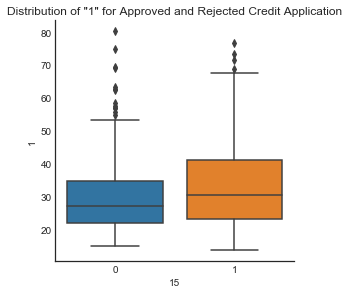

Ttest_indResult(statistic=68.30881350303038, pvalue=0.0)


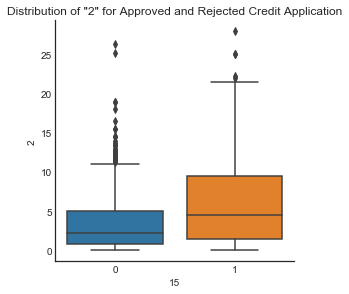

Ttest_indResult(statistic=22.649506214896903, pvalue=8.258650744072708e-97)


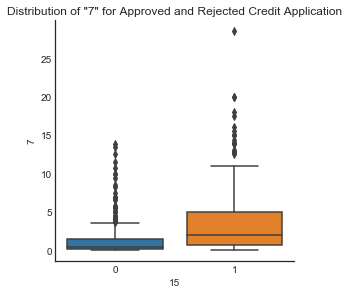

Ttest_indResult(statistic=13.808203659393687, pvalue=1.022666202998416e-40)


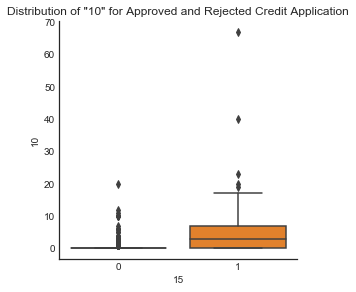

Ttest_indResult(statistic=10.50580271265132, pvalue=6.883898239954908e-25)


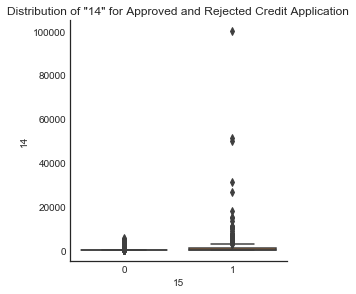

Ttest_indResult(statistic=5.127124288311523, pvalue=3.360869657866112e-07)


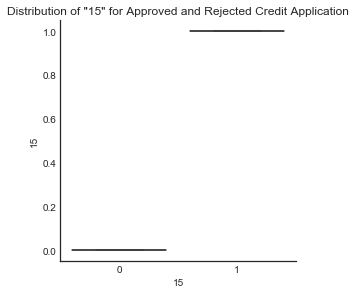

Ttest_indResult(statistic=0.0, pvalue=1.0)


In [9]:
#plotting distributions of continuous variables against approval or rejection
for col in credit_cont:
    g = sns.factorplot(x=15,
                      y=col, 
                      data=credit_cont, 
                      kind='box')
    plt.title('Distribution of "{}" for Approved and Rejected Credit Application'.format(col))
    plt.show()
    print(stats.ttest_ind(credit_cont[col].dropna(), credit_cont[15].dropna()))

Column 1 p-value is 0.0.

Columns 2, 7 all have significant differences and no outliers. 

Columns 10 and 14 have significant outliers

In [10]:
#creating sub set of data with categorical data
credit_cat = credit_raw.loc[:,[0, 3, 4, 5, 6, 8, 9, 11, 12, 15]]
credit_cat.head()

,0,3,4,5,6,8,9,11,12,15
0,b,u,g,w,v,t,t,f,g,1
1,a,u,g,q,h,t,t,f,g,1
2,a,u,g,q,h,t,f,f,g,1
3,b,u,g,w,v,t,t,t,g,1
4,b,u,g,w,v,t,f,f,s,1


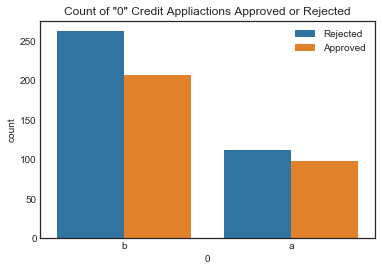

15    0    1
0           
a   112   98
b   262  206
Power_divergenceResult(statistic=108.00589970501476, pvalue=2.9474557158762434e-23)


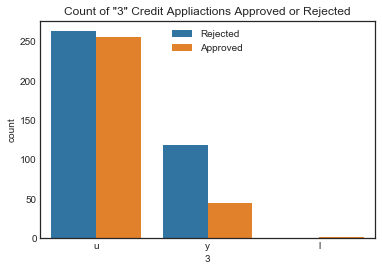

15    0    1
3           
l     0    2
u   263  256
y   118   45
Power_divergenceResult(statistic=637.561403508772, pvalue=1.545055409454076e-135)


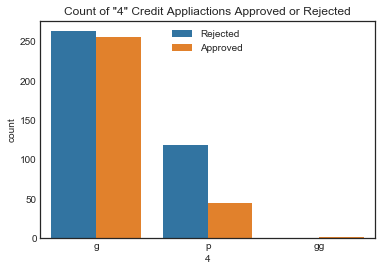

15    0    1
4           
g   263  256
gg    0    2
p   118   45
Power_divergenceResult(statistic=637.561403508772, pvalue=1.545055409454076e-135)


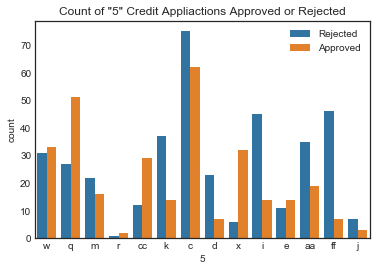

15   0   1
5         
aa  35  19
c   75  62
cc  12  29
d   23   7
e   11  14
ff  46   7
i   45  14
j    7   3
k   37  14
m   22  16
q   27  51
r    1   2
w   31  33
x    6  32
Power_divergenceResult(statistic=393.3201174743025, pvalue=1.1436746143425977e-66)


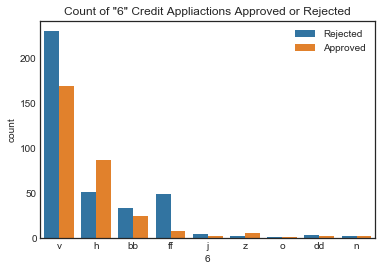

15    0    1
6           
bb   34   25
dd    4    2
ff   49    8
h    51   87
j     5    3
n     2    2
o     1    1
v   230  169
z     2    6
Power_divergenceResult(statistic=1855.9427312775326, pvalue=0.0)


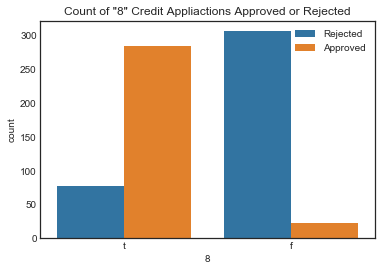

15    0    1
8           
f   306   23
t    77  284
Power_divergenceResult(statistic=357.82608695652175, pvalue=3.01326407188219e-77)


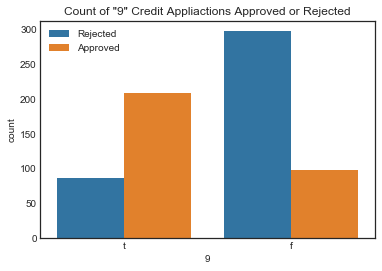

15    0    1
9           
f   297   98
t    86  209
Power_divergenceResult(statistic=173.13043478260866, pvalue=2.6842170765821688e-37)


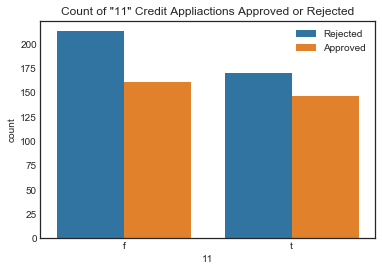

15    0    1
11          
f   213  161
t   170  146
Power_divergenceResult(statistic=14.382608695652173, pvalue=0.0024280203352694887)


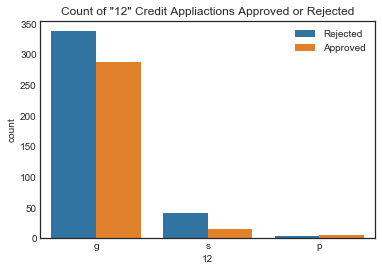

15    0    1
12          
g   338  287
p     3    5
s    42   15
Power_divergenceResult(statistic=1037.2695652173913, pvalue=5.124924990548949e-222)


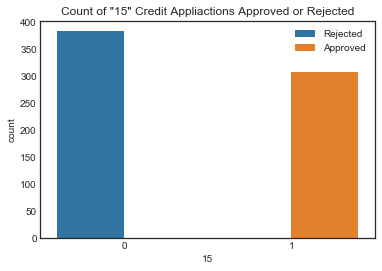

15    0    1
15          
0   383    0
1     0  307
Power_divergenceResult(statistic=706.7420289855072, pvalue=7.246062328997584e-153)


In [11]:
#plotting counts of categorical data versus approval or rejection
for col in credit_cat:
    g = sns.countplot(x=col, 
                hue=15, 
                data=credit_cat)
    plt.legend(['Rejected', 'Approved'], loc='best')
    plt.title('Count of "{}" Credit Appliactions Approved or Rejected'.format(col))
    plt.show()
    counttable = pd.crosstab(credit_cat[col], credit_cat[15])
    print(counttable)
    print(stats.chisquare(counttable, axis=None))

Columns 0, 3, 4, 5, 8, 9, and 12 all have significant differences. 

## Feature Engineering

In [12]:
#creating df for features
#turning categorical feature '5' into numbers
features = pd.get_dummies(credit_cat[5])

In [13]:
#turning categorical feature '0' into numbers
features['0'] = np.where((credit_cat[0]=='a'), 1, 0)

In [14]:
#turning categorical feature '8' into numbers
features['8'] = np.where((credit_cat[8]=='t'), 1, 0)

In [15]:
#turning categorical feature '9' into numbers
features['9'] = np.where((credit_cat[9]=='t'), 1, 0)

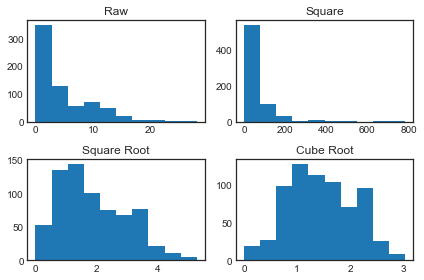

In [16]:
#plotting to transform to normality for '2'
fig = plt.figure()

fig.add_subplot(2, 2, 1)
plt.hist(credit_raw[2].dropna())
plt.title('Raw')

fig.add_subplot(2, 2, 2)
plt.hist((credit_raw[2].dropna())**2)
plt.title('Square')

fig.add_subplot(2, 2, 3)
plt.hist(np.sqrt(credit_raw[2].dropna()))
plt.title('Square Root')

fig.add_subplot(2, 2, 4)
plt.hist((credit_raw[2].dropna())**(1/3))
plt.title('Cube Root')

plt.tight_layout()
plt.show()

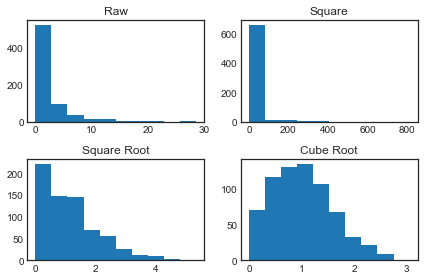

In [17]:
#plotting to transform to normality for '7'
fig = plt.figure()

fig.add_subplot(221)
plt.hist(credit_raw[7].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist((credit_raw[7].dropna())**2)
plt.title('Square')

fig.add_subplot(223)
plt.hist(np.sqrt(credit_raw[7].dropna()))
plt.title('Square Root')

fig.add_subplot(224)
plt.hist((credit_raw[7].dropna())**(1/3))
plt.title('Cube Root')

plt.tight_layout()
plt.show()

Cube root looks most normal.

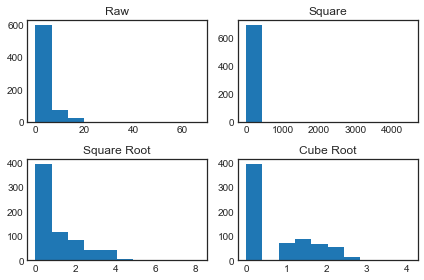

In [18]:
#plotting to transform to normality for '10'
fig = plt.figure()

fig.add_subplot(221)
plt.hist(credit_raw[10].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist((credit_raw[10].dropna())**2)
plt.title('Square')

fig.add_subplot(223)
plt.hist(np.sqrt(credit_raw[10].dropna()))
plt.title('Square Root')

fig.add_subplot(224)
plt.hist((credit_raw[10].dropna())**(1/3))
plt.title('Cube Root')

plt.tight_layout()
plt.show()

Unsure how to proceed with this attribute.  Cube root? Turn into 0 and non-zero values?

In [19]:
#Adding in continuous features with normal distributions
features['cube_root_2'] = (credit_raw[2].dropna())**(1/3)
features['cube_root_7'] = (credit_raw[7].dropna())**(1/3)
features['10'] = credit_raw[10].dropna()

features.head()

,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x,0,8,9,cube_root_2,cube_root_7,10
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.000000,1.077217,1
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1.646057,1.448631,6
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0.793701,1.144714,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1.154800,1.553616,5
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1.778447,1.195819,0
